## what I will do 

In [1]:
Agenda = {
    1: "Create data for classification problem",
    2:"Building the classification model",
    3:"3. Training the model",
    4:"Built a trsining and testing loop",
    5:"Imporve the model",
    6:"Train non-linear model",
    7:"Some practical information of non-linear activation function"
}
Agenda

{1: 'Create data for classification problem',
 2: 'Building the classification model',
 3: '3. Training the model',
 4: 'Built a trsining and testing loop',
 5: 'Imporve the model',
 6: 'Train non-linear model',
 7: 'Some practical information of non-linear activation function'}

## Import what we want

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

## 1. Create the Data

**note:** 

to generate the data I will use `make_circles()` function from Scikit-Learn 

In [3]:
from sklearn.datasets import make_circles

# make samples
n_samples = 1000

# create the circle
x , y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42 # it is like torch.manual.seed(42) 
                   )

In [4]:
print(f"lets look at x data :\n {x[:5]}")
print(f"lets look at y data :\n {y[:5]}")

lets look at x data :
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
lets look at y data :
 [1 1 1 1 0]


In [6]:
# some analysis
# to avoid the error we should convert y into data-frame
y.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [7]:
# make fataframe of data
data = pd.DataFrame({"x1":x[:,0],
                       "x2":x[:,1],
                       "label":y})
data.head()

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [8]:
# some analysis
# now I fix the problem
data["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

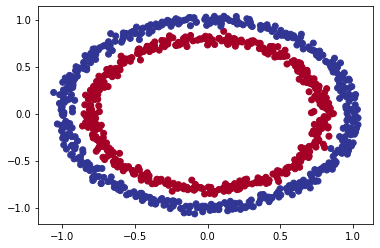

In [9]:
# visualize the data
plt.scatter(x = data["x1"],
           y = data["x2"],
           c = data["label"],
           cmap = plt.cm.RdYlBu_r)

**if we want a good result I should use non-liner activation function**

## 1.1 Input and output shape

In [10]:
x.shape , y.shape , x.ndim , y.ndim

((1000, 2), (1000,), 2, 1)

## 1.2 Turens data into a tensor and split the data

In [11]:
# converting data into a tensor 
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# view the data
x[:5] , y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
# split the data with sk-learn library
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,
                                                      y,
                                                      test_size = 0.2 , # 20% of data for test mode
                                                      random_state = 42)

In [13]:
x_train.shape , y_train.shape 

(torch.Size([800, 2]), torch.Size([800]))

## 2. Building the classification model

**by using subclass method I will complete**

In [14]:
from torch import nn

# chek the device 
device = "cudu" if torch.cuda.is_available() else "cpu"
device

'cpu'

No problem iam not activate the GPU in my notebook

In [15]:
# lets create subclass module

# 1. construct a model class that subclass nn.module
class modelv0(nn.Module):
    def __init__(self): # i in last code in my kaggle account explain what is this mean
        super().__init__()
        
        # 2. create a linear layers to handel the data
        self.layer1 = nn.Linear(in_features = 2 , out_features = 7) # produce 7 featuers after tack 2 features
        self.layer2 = nn.Linear(in_features = 7 , out_features = 5) # .....   5 ......    .... .... 5  .......
        self.layer3 = nn.Linear(in_features = 5 , out_features = 1) # ......  1 ......     .... ... 5 ......
        
    # define the forward method to computation the data in the model 
    def forward(self , x : torch.tensor) -> torch.tensor :
        return self.layer3(self.layer2(self.layer1(x)))
        

In [16]:
# 4. create an object from the class
model_0 = modelv0()
model_0

modelv0(
  (layer1): Linear(in_features=2, out_features=7, bias=True)
  (layer2): Linear(in_features=7, out_features=5, bias=True)
  (layer3): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([[ 0.5402,  0.6129],
         [-0.6938, -0.3771],
         [-0.4606, -0.0047],
         [-0.2133, -0.4907],
         [ 0.4158, -0.1244],
         [-0.6729, -0.2952],
         [ 0.1496,  0.2184]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2388,  0.4359, -0.5681,  0.5707, -0.5760, -0.1097, -0.5599],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.1896, -0.0914,  0.1248, -0.0152, -0.0500, -0.3295, -0.0428],
         [ 0.2880,  0.2779,  0.0975,  0.3055, -0.0604,  0.0167,  0.0894],
         [ 0.3469, -0.1641,  0.0927,  0.1994,  0.0592, -0.2078, -0.0575],
         [-0.0793,  0.2583, -0.3559, -0.1419,  0.1622, -0.0829,  0.1688],
         [-0.1057, -0.1703, -0.2891,  0.1337,  0.0088, -0.0269, -0.1645]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.1115, -0.0233, -0.3279, -0.0288,  0.1663], requires_grad=True),
 Parameter containing:
 tensor([[-0.2097, -0.0878,  0.0155,  0.3907,  0.1535]], requires_grad=True),
 Par

In [18]:
# check the model contant
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5402,  0.6129],
                      [-0.6938, -0.3771],
                      [-0.4606, -0.0047],
                      [-0.2133, -0.4907],
                      [ 0.4158, -0.1244],
                      [-0.6729, -0.2952],
                      [ 0.1496,  0.2184]])),
             ('layer1.bias',
              tensor([ 0.2388,  0.4359, -0.5681,  0.5707, -0.5760, -0.1097, -0.5599])),
             ('layer2.weight',
              tensor([[ 0.1896, -0.0914,  0.1248, -0.0152, -0.0500, -0.3295, -0.0428],
                      [ 0.2880,  0.2779,  0.0975,  0.3055, -0.0604,  0.0167,  0.0894],
                      [ 0.3469, -0.1641,  0.0927,  0.1994,  0.0592, -0.2078, -0.0575],
                      [-0.0793,  0.2583, -0.3559, -0.1419,  0.1622, -0.0829,  0.1688],
                      [-0.1057, -0.1703, -0.2891,  0.1337,  0.0088, -0.0269, -0.1645]])),
             ('layer2.bias',
              tensor([ 0.1115, -0.0233, -0.3279, -0.0288,

**lets see what happens when we pass some data through the model**

In [19]:
untraind_preds = model_0(x_test)

print(f"length of prediction:{len(untraind_preds)} , and the shape :{untraind_preds.shape}")
print(f"length of test samples:{len(y_test)}, and the shape:{y_test.shape}")
print(f"first 10 predictions :\n {untraind_preds[:10]}")
print(f"first 10 test samples :\n {y_test[:10]}")

length of prediction:200 , and the shape :torch.Size([200, 1])
length of test samples:200, and the shape:torch.Size([200])
first 10 predictions :
 tensor([[-0.2697],
        [-0.2784],
        [-0.2073],
        [-0.2875],
        [-0.1448],
        [-0.1506],
        [-0.2248],
        [-0.1947],
        [-0.2100],
        [-0.2783]], grad_fn=<SliceBackward0>)
first 10 test samples :
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [20]:
untraind_preds[:5] == y_test[:5]

tensor([[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]])

## 2.1 setup loss function and optimzier

In [21]:
# create loss function 
loss_fun = nn.BCEWithLogitsLoss() # Which = to sigmoid built in 

# create an optimizer 
optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr = 0.01)

In [22]:
# calculate accuracy 
def accuracy(y_true,y_pred):
    correct = torch.eq(y_true , y_pred).sum().item() # rq which is equale in to container data
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. Training the model

PyTorch training loop steps
1. Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).
1. Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).
3. Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).
4. Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).
5. Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

## 3.1 going from raw model output to predicted labels

In [44]:
# view the first 5 output of the forward pass 
y_logits = model_0(x_test[:5])
y_logits

tensor([[-0.2697],
        [-0.2784],
        [-0.2073],
        [-0.2875],
        [-0.1448]], grad_fn=<AddmmBackward0>)

In [24]:
# try using different activation function
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4330],
        [0.4308],
        [0.4484],
        [0.4286],
        [0.4639]], grad_fn=<SigmoidBackward0>)

In [25]:
# now i will convert the probability into labels
y_preds = torch.round(y_pred_probs)

y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)

In [26]:
# in full
y_pred_labels = torch.round(torch.sigmoid(model_0(x_test)[:5]))

# remove the extra dimention
y_preds.squeeze()

tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

In [27]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

## 4. Built a trsining and testing loop

In [28]:
torch.manual_seed(42)

# numbers of epochs
epochs = 100

# built training and evaluation loop 
for epoch in range(epochs):
    
    ## training 
    model_0.train()
    
    # 1. forward pass 
    y_logits = model_0(x_train).squeeze() # remove extra 
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 2. calculate loss function
    loss = loss_fun(y_logits,
                   y_train)
    acc = accuracy(y_true = y_train ,
                  y_pred = y_pred)
    
    # 3. optimize zero grad
    optimizer.zero_grad()
    
    # 4. loss backwards
    loss.backward()
    
    # 5. optimize zero step
    
    ### testing mode
    model_0.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_logits = model_0(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2. calculate loss
        test_loss = loss_fun(y_test,
                            test_pred)
        test_acc = accuracy(y_true = y_test,
                           y_pred = test_pred)
        
    # print what happe
    if epoch % 10 == 0:
        print(f"epoch :{epoch} | loss :{loss} | accuracy :{acc:.2f}% | test loss :{test_loss:.2f}% | test accuracy :{test_acc:.2f}%")

epoch :0 | loss :0.6992039680480957 | accuracy :50.00% | test loss :1.00% | test accuracy :50.00%
epoch :10 | loss :0.6992039680480957 | accuracy :50.00% | test loss :1.00% | test accuracy :50.00%
epoch :20 | loss :0.6992039680480957 | accuracy :50.00% | test loss :1.00% | test accuracy :50.00%
epoch :30 | loss :0.6992039680480957 | accuracy :50.00% | test loss :1.00% | test accuracy :50.00%
epoch :40 | loss :0.6992039680480957 | accuracy :50.00% | test loss :1.00% | test accuracy :50.00%
epoch :50 | loss :0.6992039680480957 | accuracy :50.00% | test loss :1.00% | test accuracy :50.00%
epoch :60 | loss :0.6992039680480957 | accuracy :50.00% | test loss :1.00% | test accuracy :50.00%
epoch :70 | loss :0.6992039680480957 | accuracy :50.00% | test loss :1.00% | test accuracy :50.00%
epoch :80 | loss :0.6992039680480957 | accuracy :50.00% | test loss :1.00% | test accuracy :50.00%
epoch :90 | loss :0.6992039680480957 | accuracy :50.00% | test loss :1.00% | test accuracy :50.00%


## 4.1  Make prediction and evalueate the model

In [29]:
# the first thing i will do i will visualize the data and result
import requests
from pathlib import Path

# download helper function from the repo
if Path("heplper_functions.py").is_file(): # aready exist
    print("heplper_functions.py already exist ,skipping download")
else:
    print("downloading heplper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("heplper_functions.py" , "wb") as f:
        f.write(request.content)

from heplper_functions import plot_predictions , plot_decision_boundary

downloading heplper_functions.py


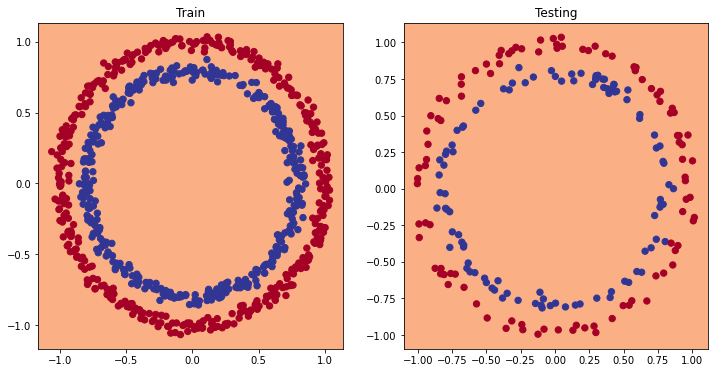

In [30]:
# plot decision boundaries for training and test sets
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0 , x_train , y_train)
plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_0 , x_test , y_test)

## 5. Imporve the model

In [31]:
# 1. create class with non linear activation function 
class modelv1(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. create a linear layers to handel the data
        self.layer1 = nn.Linear(in_features = 2 , out_features = 10) # produce 7 featuers after tack 2 features
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(in_features = 10 , out_features = 10) # .....   5 ......    .... .... 5  .......
        self.relu = nn.ReLU()
        self.layer3 = nn.Linear(in_features = 10 , out_features = 1) # ......  1 ......     .... ... 5 ........
        
        
    # 3. define the forward function 
    def forward(self , x:torch.tensor) -> torch.tensor:
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [32]:
# create an object from class
model_1 = modelv1()
model_1

modelv1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
list(model_1.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998],
         [ 0.5451,  0.1045],
         [-0.3301,  0.1802]], requires_grad=True),
 Parameter containing:
 tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
          0.0667, -0.6984], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927],
         [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
           0.2475, -0.2247],
         [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
          -0.1886, -0.1886],
         [ 0.2844,  0.1054,  0.3043, -0.2610,

In [34]:
# setup the loss & optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters() , lr = 0.1)

## 6. Train non-linear model 

In [35]:
# Fit the model
torch.manual_seed(42)
epochs = 3000


for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_1(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(x_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%
Epoch: 1000 | Loss: 0.56818, Accuracy: 87.75% | Test Loss: 0.57378, Test Accuracy: 86.50%
Epoch: 1100 | Loss: 0.

## 6.1 evaluate the model

In [36]:
model_1.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_1(x_test))).squeeze()
    
y_preds[:5] , y_test[:5]

(tensor([1., 0., 1., 0., 1.]), tensor([1., 0., 1., 0., 1.]))

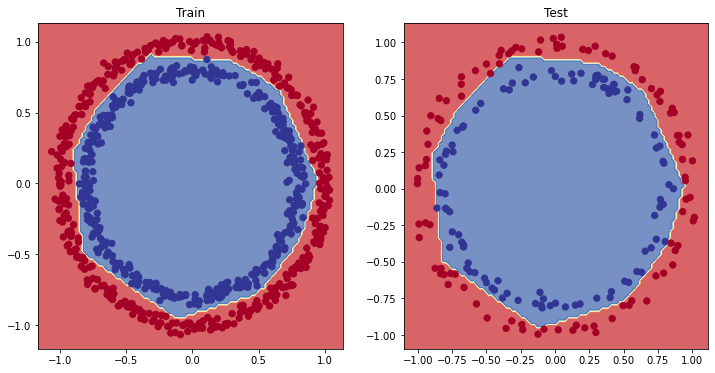

In [37]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, x_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, x_test, y_test) # model_3 = has non-linearity

## 7. Some practical information of non-linear activation function

In [38]:
# create a tensor 
a = torch.arange(-10,10,1)
a

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9])

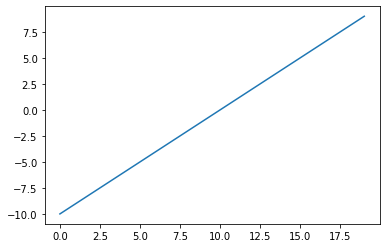

In [39]:
plt.plot(a)

In [40]:
# define relu activation function 
def relu(x):
    return torch.maximum(torch.tensor(0) , x)

# pass data into function
relu(a)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

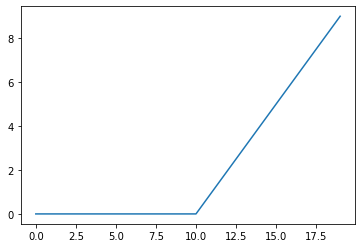

In [41]:
# visualize 
plt.plot(relu(a))

In [42]:
# define sigmoid activ function
def sigmoid(x):
    return 1/(1+torch.exp(-x))

# pass data
sigmoid(a)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

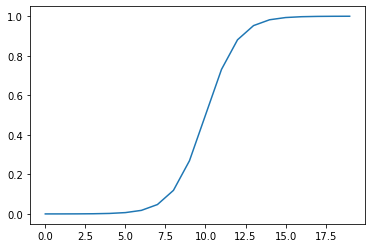

In [45]:
plt.plot(sigmoid(a))

**I will stop here and come back soon in different notebook**

**Thanks torch doc**